<font size="6.5"> PREDICTION USING UNSUPERVISED MACHINE LEARNING </font>

Predicting the optimum number of clusters in Iris dataset and representing them visually.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<font size="5">Input Data</font>

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()
#finding basic features of the data set
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<font size='6'>Basic Analysis of data</font>

In [4]:
df['target']= iris.target
df #each value of target corresponds to different species, for example taget 0 is Iris-setosa

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<font size='5'>0= Iris-setosa, 1=Iris-versicolor, 2= Iris-virginica</font>

In [5]:
#putting each species into different dataframes
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

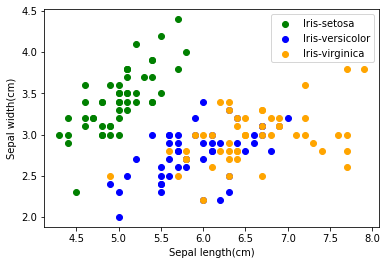

In [6]:
#plotting sepal length vs sepal width
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',label= 'Iris-setosa')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',label= 'Iris-versicolor')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='orange',label= 'Iris-virginica')
plt.xlabel('Sepal length(cm)')
plt.ylabel('Sepal width(cm)')
plt.legend()

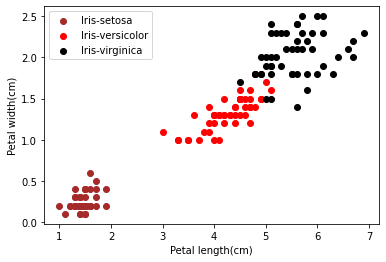

In [7]:
#plotting petal length vs petal width
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='brown',label= 'Iris-setosa')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red',label= 'Iris-versicolor')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='black',label= 'Iris-virginica')
plt.xlabel('Petal length(cm)')
plt.ylabel('Petal width(cm)')
plt.legend()

<font size='5'>Optimum Number of Clusters & Elbow method</font>

C:\Users\Brillia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


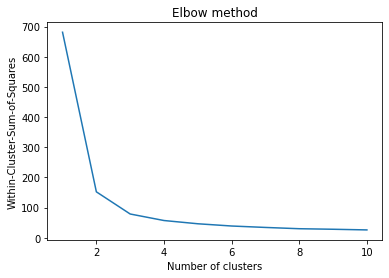

In [11]:
#k-means classification
x = df.iloc[:, [0, 1, 2, 3]].values


from sklearn.cluster import KMeans
wcss= []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster-Sum-of-Squares') 
plt.show()

<font size=5>From the above, the optimal number of clusters is 3.</font>

<font size='6'>Visualization</font>

In [13]:
#k-mean classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

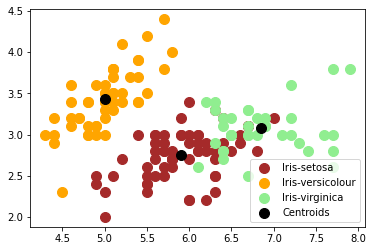

In [22]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'brown', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'lightgreen', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.legend()